In [15]:
import sys
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, ".."))
if root_dir not in sys.path:
	sys.path.insert(0, root_dir)

from src.drp_fall_2025.topology import SimplicialComplex
from src.drp_fall_2025.analysis import compute_euler_characteristic, plot_histogram, plot_boxplot, plot_combined_visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import trange

# Set style for better-looking plots
sns.set_theme(style="whitegrid", palette="colorblind")

# Problem Set 1: Euler Characteristic of Random Complexes

## Overview
This notebook demonstrates:
1. Creating random simplicial complexes from a given list of vertices
2. Computing Euler characteristics
3. Statistical analysis of Euler characteristics across 100 random complexes
4. Visualization with histograms and box plots

## Part (a): Random Simplicial Complex Generation

We create a Python function that takes a list of vertices and outputs a random simplicial complex.

The complex is generated using a **bottom-up probabilistic process**:
- Start with all vertices (0-simplices)
- For each dimension k, consider all possible k-simplices
- Add each k-simplex with probability p_k if all its boundary faces exist

In [16]:
# Example: Generate a random complex from 5 vertices

num_vertices = 5
vertices = list(range(num_vertices))

# Define probabilities for each dimension using dict comprehension
p_dict = {i: 0.6 - (i - 1) * 0.1 for i in range(1, 5)}  # Decreasing probabilities

# Generate random complex
random_complex = SimplicialComplex.from_bottom_up_process(num_vertices, p_dict)

print("Generated Random Simplicial Complex:")
print(f"  Vertices: {vertices}")
print(f"  Complex: {random_complex}")
print(f"\nAll simplices:")
for dim in range(random_complex.dimension + 1):
    simplices_of_dim = [s for s in random_complex.simplices if len(s) - 1 == dim]
    print(f"  Dimension {dim}: {len(simplices_of_dim)} simplices")
    if len(simplices_of_dim) <= 10:  # Only show if not too many
        print(f"    {sorted(simplices_of_dim)}")

Generated Random Simplicial Complex:
  Vertices: [0, 1, 2, 3, 4]
  Complex: SimplicialComplex(vertices=5, simplices=11, dim=1)

All simplices:
  Dimension 0: 5 simplices
    [(0,), (1,), (2,), (3,), (4,)]
  Dimension 1: 6 simplices
    [(0, 1), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4)]


## Part (b): Computing Euler Characteristic

The Euler characteristic χ is a topological invariant defined as:

$$\chi = k_0 - k_1 + k_2 - k_3 + \ldots$$

where $k_i$ is the number of $i$-simplices.

Key properties:
- For a connected graph: χ = 1 - (number of loops)
- For a sphere: χ = 2
- For a torus: χ = 0

In [17]:
# Compute Euler characteristic for the example complex

euler_char = compute_euler_characteristic(random_complex)

print(f"Euler Characteristic: χ = {euler_char}")
print(f"\nInterpretation:")
print(f"  The Euler characteristic captures topological features of the complex.")
print(f"  For this randomly generated complex: χ = {euler_char}")

Euler Characteristic: χ = -1

Interpretation:
  The Euler characteristic captures topological features of the complex.
  For this randomly generated complex: χ = -1


## Part (c): Generate 100 Random Complexes

Now we generate 100 random complexes from 10 vertices and record each Euler characteristic.

We use uniform probabilities of 0.5 for all dimensions.

In [18]:
# Configuration constants
NUM_VERTICES = 10
NUM_RUNS = 100
PROBABILITY = 0.5
MAX_DIMENSION = 10

# Uniform probabilities using dict comprehension
P_DICT = {i: PROBABILITY for i in range(1, MAX_DIMENSION + 1)}

print(f"Running simulation with:")
print(f"  Number of vertices: {NUM_VERTICES}")
print(f"  Number of runs: {NUM_RUNS}")
print(f"  Probabilities: p_k = {PROBABILITY} for all dimensions k ∈ [1, {MAX_DIMENSION}]")
print(f"\nGenerating complexes...")

Running simulation with:
  Number of vertices: 10
  Number of runs: 100
  Probabilities: p_k = 0.5 for all dimensions k ∈ [1, 10]

Generating complexes...


In [19]:
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate complexes and compute Euler characteristics
euler_characteristics = []

for i in trange(NUM_RUNS, desc="Computing Euler characteristics"):
    complex_k = SimplicialComplex.from_bottom_up_process(NUM_VERTICES, P_DICT)
    chi = compute_euler_characteristic(complex_k)
    euler_characteristics.append(chi)

# Convert to pandas Series for easier analysis
euler_series = pd.Series(euler_characteristics, name="Euler Characteristic")

print(f"\n✓ Generated {NUM_RUNS} random complexes")
print(f"✓ Computed all Euler characteristics")

Computing Euler characteristics: 100%|██████████| 100/100 [00:00<00:00, 666.96it/s]


✓ Generated 100 random complexes
✓ Computed all Euler characteristics


## Part (d): Statistical Analysis and Visualization

We now analyze the distribution of Euler characteristics and create visualizations.

In [20]:
# Constants for formatting
SEPARATOR = "=" * 60

# Compute statistics once for reuse
mean_chi = euler_series.mean()
median_chi = euler_series.median()
std_chi = euler_series.std()
min_chi = euler_series.min()
max_chi = euler_series.max()
q1, q2, q3 = euler_series.quantile([0.25, 0.5, 0.75])

# Statistical Summary
print(SEPARATOR)
print("STATISTICAL SUMMARY")
print(SEPARATOR)

print(f"\n--- Euler Characteristic Statistics ---")
print(f"Mean (Average): {mean_chi:.4f}")
print(f"Median: {median_chi:.1f}")
print(f"Standard Deviation: {std_chi:.4f}")
print(f"Minimum: {min_chi}")
print(f"Maximum: {max_chi}")
print(f"Range: [{min_chi}, {max_chi}]")

print(f"\n--- Percentiles ---")
print(f"25th percentile: {q1:.1f}")
print(f"50th percentile (median): {q2:.1f}")
print(f"75th percentile: {q3:.1f}")

print(f"\n--- Full Statistical Summary ---")
print(euler_series.describe())

STATISTICAL SUMMARY

--- Euler Characteristic Statistics ---
Mean (Average): -5.1800
Median: -5.0
Standard Deviation: 2.0170
Minimum: -10
Maximum: 0
Range: [-10, 0]

--- Percentiles ---
25th percentile: -7.0
50th percentile (median): -5.0
75th percentile: -4.0

--- Full Statistical Summary ---
count    100.000000
mean      -5.180000
std        2.016998
min      -10.000000
25%       -7.000000
50%       -5.000000
75%       -4.000000
max        0.000000
Name: Euler Characteristic, dtype: float64


In [21]:
# Plotting helper functions are loaded from analysis.py module

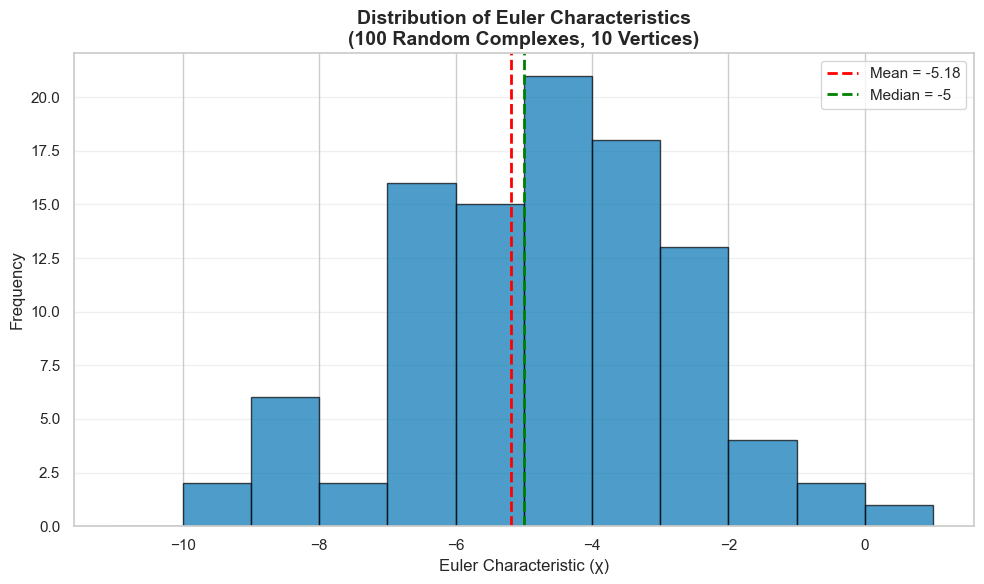

In [22]:
# Use the extracted plotting function
plot_histogram(euler_series, NUM_VERTICES, NUM_RUNS)

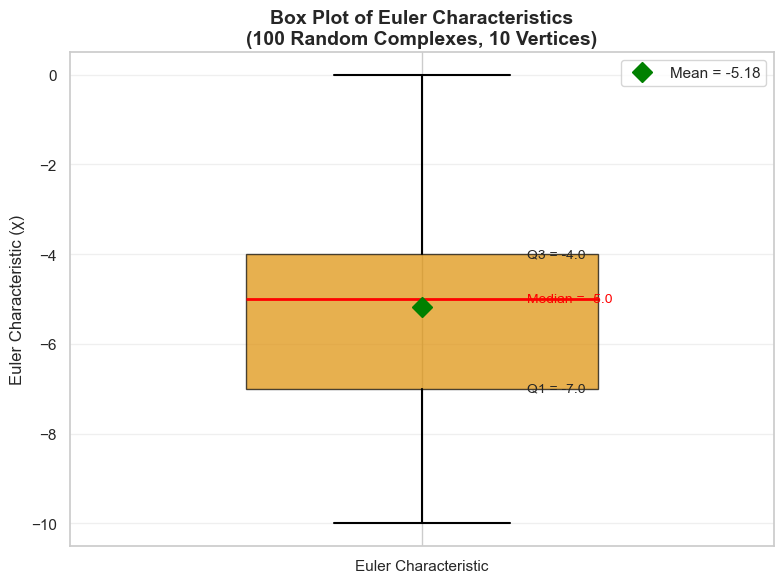

In [23]:
# Use the extracted plotting function
plot_boxplot(euler_series, NUM_VERTICES, NUM_RUNS)

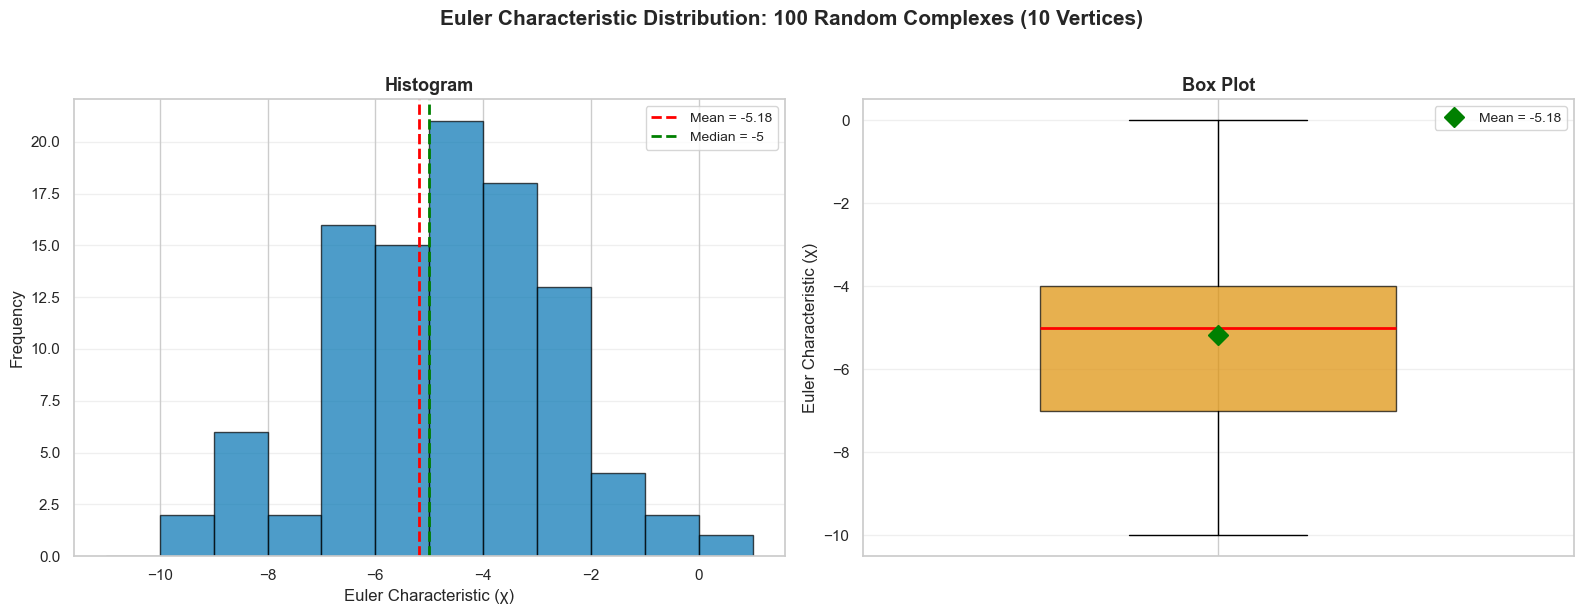

In [24]:
# Use the extracted plotting function
plot_combined_visualization(euler_series, NUM_VERTICES, NUM_RUNS)

## Discussion of Findings

### Key Observations

In [25]:
print(SEPARATOR)
print("DISCUSSION OF FINDINGS")
print(SEPARATOR)

# Reuse computed statistics
print(f"\n1. AVERAGE EULER CHARACTERISTIC")
print(f"   Mean χ = {mean_chi:.4f}")
print(f"")
print(f"   Interpretation:")
if abs(mean_chi) < 2:
    print(f"   • The average is close to zero, suggesting that the random complexes")
    print(f"     have a balance between different dimensional features.")
elif mean_chi > 2:
    print(f"   • The positive average suggests that lower-dimensional simplices")
    print(f"     (vertices, edges) dominate over higher-dimensional ones.")
else:
    print(f"   • The negative average suggests rich higher-dimensional structure.")

print(f"\n2. DISTRIBUTION SHAPE")
print(f"   Range: [{min_chi}, {max_chi}]")
print(f"   Standard Deviation: {std_chi:.4f}")
print(f"")
print(f"   Observations:")
skewness = (mean_chi - median_chi) / std_chi if std_chi > 0 else 0
if abs(skewness) < 0.1:
    print(f"   • The distribution appears roughly symmetric (mean ≈ median).")
elif skewness > 0:
    print(f"   • The distribution is right-skewed (mean > median).")
    print(f"     Some complexes have unusually high Euler characteristics.")
else:
    print(f"   • The distribution is left-skewed (mean < median).")
    print(f"     Some complexes have unusually low Euler characteristics.")

DISCUSSION OF FINDINGS

1. AVERAGE EULER CHARACTERISTIC
   Mean χ = -5.1800

   Interpretation:
   • The negative average suggests rich higher-dimensional structure.

2. DISTRIBUTION SHAPE
   Range: [-10, 0]
   Standard Deviation: 2.0170

   Observations:
   • The distribution appears roughly symmetric (mean ≈ median).


In [26]:
cv = (std_chi / abs(mean_chi)) * 100 if mean_chi != 0 else float('inf')

print(f"\n3. VARIABILITY")
print(f"   Coefficient of Variation: {cv:.1f}%")
print(f"")
if cv < 20:
    print(f"   • Low variability: Random complexes have similar Euler characteristics.")
elif cv < 50:
    print(f"   • Moderate variability: Some diversity in topological features.")
else:
    print(f"   • High variability: Random generation produces diverse topologies.")


3. VARIABILITY
   Coefficient of Variation: 38.9%

   • Moderate variability: Some diversity in topological features.


In [27]:
print(f"\n4. THEORETICAL CONNECTIONS")
print(f"   • The Euler characteristic relates to Betti numbers: χ = β₀ - β₁ + β₂ - β₃ + ...")
print(f"   • For these random complexes with p = {PROBABILITY}, the generation process creates")
print(f"     a balance between adding simplices and maintaining sparsity.")
print(f"   • The variation in χ reflects the stochastic nature of the generation process.")

print(f"\n5. COMPARISON WITH THEORY")
print(f"   • For a complete complex on n vertices: χ = 1 (contractible to a point)")
print(f"   • For n disconnected vertices: χ = n = {NUM_VERTICES}")
print(f"   • Our average χ = {mean_chi:.2f} falls between these extremes,")
print(f"     indicating partially connected structures with various topological features.")


4. THEORETICAL CONNECTIONS
   • The Euler characteristic relates to Betti numbers: χ = β₀ - β₁ + β₂ - β₃ + ...
   • For these random complexes with p = 0.5, the generation process creates
     a balance between adding simplices and maintaining sparsity.
   • The variation in χ reflects the stochastic nature of the generation process.

5. COMPARISON WITH THEORY
   • For a complete complex on n vertices: χ = 1 (contractible to a point)
   • For n disconnected vertices: χ = n = 10
   • Our average χ = -5.18 falls between these extremes,
     indicating partially connected structures with various topological features.


In [28]:
# Calculate outlier information
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outlier_count = ((euler_series < lower_bound) | (euler_series > upper_bound)).sum()

print(f"\n6. INSIGHTS FROM VISUALIZATIONS")
print(f"   Histogram:")
print(f"   • Shows the frequency distribution of Euler characteristics")
print(f"   • Reveals the most common values and overall shape of the distribution")
print(f"")
print(f"   Box Plot:")
print(f"   • Displays quartiles: Q1 = {q1:.1f}, Median = {median_chi:.1f}, Q3 = {q3:.1f}")
print(f"   • IQR = {iqr:.1f} (measure of spread)")

if outlier_count > 0:
    print(f"   • Identifies {outlier_count} outlier(s) (unusual topological configurations)")
else:
    print(f"   • No outliers detected (all values within expected range)")


6. INSIGHTS FROM VISUALIZATIONS
   Histogram:
   • Shows the frequency distribution of Euler characteristics
   • Reveals the most common values and overall shape of the distribution

   Box Plot:
   • Displays quartiles: Q1 = -7.0, Median = -5.0, Q3 = -4.0
   • IQR = 3.0 (measure of spread)
   • No outliers detected (all values within expected range)
